# Extentions:

*  Extend it to fit a ReLU regression, even with the “pretend first layer activations” code already given there.# Linear Regression the Hard Way

Task: fit a linear regression using gradient descent

## Setup

In [21]:
import numpy as np
np.set_printoptions(precision=3)
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [22]:
DATASET = 'toy'

if DATASET == 'toy':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 3.5])[:, np.newaxis]
elif DATASET == "temps":
    data = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv", skiprows=1)
    # Shape x to be items-by-features
    x = data.iloc[:, 0].values.astype(np.float32)[:, np.newaxis]
    # scale x to a reasonable range
    x -= 1880.0
    x /= 100.
    y_true = data.iloc[:, 1].values.astype(np.float32)[:, np.newaxis]


(4, 1) (4, 1)


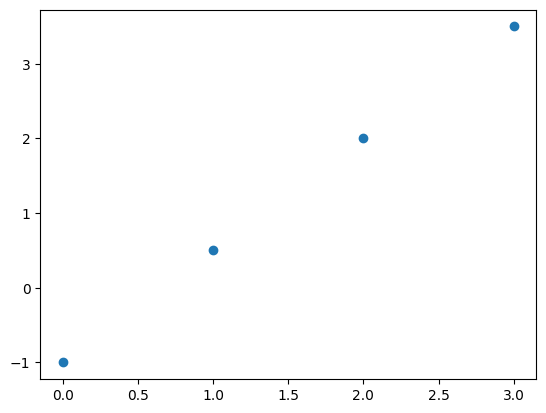

In [23]:
if len(x) < 50:
    plt.scatter(x, y_true)
else:
    plt.plot(x, y_true)
print(x.shape, y_true.shape)

In [24]:
# a simple hardcoded linear layer
pretend_first_layer_out = x @ np.ones((1, 2)) + np.array([0.0, -0.5])

# a rectifier
pretend_first_layer_activations = np.maximum(pretend_first_layer_out, 0)
f1, f2 = pretend_first_layer_activations.T

Final Loss: 0.002, final weights: [1.47], final bias: [-0.935]


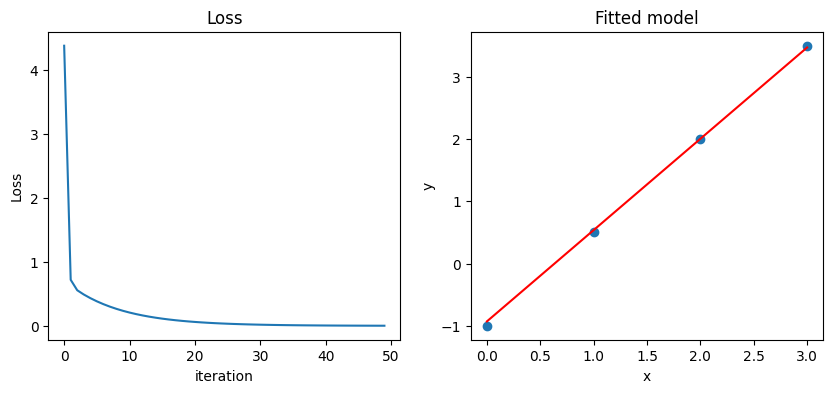

In [26]:
## Working Cell

# Set hyperparameters
learning_rate = 0.1
num_iter = 50

# Initialize parameters
weights = np.array([[0.0]])
bias = np.array([0.0])

# Keep a log of loss values
losses = []

for i in range(num_iter):
    # Forward Pass
    y_pred = weights * x + bias
    resid = y_true - y_pred
    mae = np.mean(np.abs(resid))
    mse = np.mean(np.square(resid))
    losses.append(mse)
    
    # Backprop through the loss
    n_points = x.shape[0]
    signs_resid = np.sign(resid)
    y_pred_grad = -(signs_resid/n_points)
    mse_resid_grad = -2 * resid / n_points  # Gradient of MSE loss
    y_pred_grad = mse_resid_grad
    
    # Backprop through adding bias
    bias_grad = sum(y_pred_grad)
    
    # Gradient Descent
    bias -= learning_rate * bias_grad
    
    # Backprop through the weights
    weights_grad = x.T @ y_pred_grad
    weights -= learning_rate * weights_grad

# Plot the results
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].plot(losses)
axs[0].set(title="Loss", xlabel="iteration", ylabel="Loss")
axs[1].scatter(x, y_true)
axs[1].plot(x, y_pred, 'r');
axs[1].set(title="Fitted model", xlabel='x', ylabel='y')
print(f"Final Loss: {losses[-1]:.3f}, final weights: {weights.flatten()}, final bias: {bias}")

**Check your results against the d_mae_d_ypred you computed in the Wednesday notebook. Are the values correct? Are they of the correct sign? Consider whether you might need to negate the result (by putting a - sign in front).**

Based on the Wednesday one, the values are correct and the only thing that differs them is the sign. It is all opposite with the Wednesday, 

ReLu Regression

In [ ]:
## Working Cell

# Set hyperparameters
learning_rate = 0.1
num_iter = 50

# Initialize parameters
weights = np.array([[0.0, 0.0]])
bias = np.array([0.0])

# Keep a log of loss values
losses = []

for i in range(num_iter):
    # Forward Pass
    y_pred = weights * pretend_first_layer_activations + bias
    resid = y_true - y_pred
    mae = np.mean(np.abs(resid))
    mse = np.mean(np.square(resid))
    losses.append(mse)
    
    # Backprop through the loss
    n_points = x.shape[0]
    signs_resid = np.sign(resid)
    y_pred_grad = -(signs_resid / n_points)
    mse_resid_grad = -2 * resid / n_points  # Gradient of MSE loss
    y_pred_grad = mse_resid_grad
    
    # Backprop through the ReLU activation
    relu_grad = (pretend_first_layer_activations > 0) * 1
    f1_grad = y_pred_grad * relu_grad
    f2_grad = y_pred_grad * relu_grad
    
   # Backprop through the linear layer
    x_grad = f1_grad * 2
    weights_grad = x.T @ y_pred_grad
    weights -= learning_rate * weights_grad.reshape(2,)
    bias -= learning_rate * np.sum(y_pred_grad)

# Plot the results
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].plot(losses)
axs[0].set(title="Loss", xlabel="axes title", ylabel="Loss")
axs[1].scatter(x, y_true)
axs[1].plot(x, y_pred, 'r');
axs[1].set(title="Fitted model", xlabel='x', ylabel='y')
print(f"Final Loss: {losses[-1]:.3f}, final weights: {weights.flatten()}, final bias: {bias}")

## Summary

Code changes that were needed to make the relu activation possible were the weights array, I also need to add the gradient for relu and finally change the code of the weights gradient as well. 


## Reflections

Based on these changes, I do see that by fitting reLu can be helpful considering the decrease number of loss. 